In [154]:
# Importing required libraries
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [155]:
archive_df =pd.read_csv('twitter-archive-enhanced.csv')

In [156]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
Image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t' )

In [157]:

consumer_key = '###########'
consumer_secret = '#############'
access_token = '##############'
access_secret = '############'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

Error on tweet id 888202515573088257;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 873697596434513921;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872668790621863937;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 872261713294495745;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 869988702071779329;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 866816280283807744;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 861769973181624320;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 856602993587888130;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 851953902622658560;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 845459076796616705;[{'code': 144, 'message': 'No status found with that ID.'}]
Error on tweet id 844704788403

In [158]:
tweet_list=[]
with open ('tweet_json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_list.append(tweet)

api_df = pd.DataFrame(tweet_list)
api_df = api_df[['id_str','retweet_count','favorite_count']]

## Data Assessing

In [258]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [252]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [253]:
archive_df[archive_df['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [254]:
archive_df[archive_df['name'].duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
23,887473957103951883,NaN,NaN,2017-07-19 00:47:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Canela. She attempted some fancy porch...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [255]:
archive_df['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Winston       9
Bo            9
Sadie         8
the           8
Daisy         7
an            7
Toby          7
Buddy         7
Bailey        7
Dave          6
Koda          6
Oscar         6
Jax           6
Jack          6
Stanley       6
Scout         6
Bella         6
Rusty         6
Milo          6
Leo           6
Gus           5
           ... 
Dietrich      1
Kanu          1
Franq         1
Fwed          1
Flash         1
Tyrus         1
Danny         1
Skittles      1
Tango         1
Snoop         1
Gunner        1
by            1
Tedders       1
Julio         1
Rumpole       1
Kara          1
Bobby         1
Jonah         1
Chadrick      1
Taz           1
Alfy          1
Tayzie        1
Fillup        1
Lacy          1
Link          1
Winifred      1
Sailer        1
Ronduh        1
Tycho         1
Mimosa        1
Name: name, Length: 957,

In [260]:
archive_df['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [165]:
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [166]:
archive_df['rating_denominator'].describe()

count    2356.000000
mean       10.455433
std         6.745237
min         0.000000
25%        10.000000
50%        10.000000
75%        10.000000
max       170.000000
Name: rating_denominator, dtype: float64

In [167]:
with pd.option_context('max_colwidth', 200):
    display(archive_df[archive_df['rating_denominator'] != 10][['tweet_id',
                                                                'text',
                                                                'rating_numerator',
                                                                'rating_denominator']])

,tweet_id,text,rating_numerator,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
342,832088576586297345,@docmisterio account started on 11/15/15,11,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84,70
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24,7
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,165,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,204,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


In [168]:
with pd.option_context('max_colwidth', 200):
    row = display(archive_df[archive_df['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])


,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


In [169]:
Image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [170]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [171]:
sum(Image_predictions_df['jpg_url'].duplicated())


66

In [172]:
Image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [173]:
Image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [174]:
Image_predictions_df['jpg_url'].value_counts()

https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/Co-hmcYXYAASkiG.jpg                                            2
https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/C4bTH6nWMAAX_bJ.jpg                                            2
https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg                                            2
https://pbs.twimg.com/media/Cp6db4-XYAAMmqL.jpg                                            2
https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg                                            2
https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg                                            2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                       

In [175]:
Image_predictions_df.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [176]:
api_df

,id_str,retweet_count,favorite_count
0,892420643555336193,7548,35721
1,892177421306343426,5596,30867
2,891815181378084864,3705,23213
3,891689557279858688,7730,39020
4,891327558926688256,8334,37262
5,891087950875897856,2794,18788
6,890971913173991426,1816,10916
7,890729181411237888,16893,60200
8,890609185150312448,3848,25848
9,890240255349198849,6572,29511


In [177]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
id_str            2331 non-null object
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(2), object(1)
memory usage: 54.7+ KB


In [178]:
api_df.retweet_count.value_counts()

1119     7
221      6
721      5
220      5
448      5
223      5
240      4
1195     4
951      4
82       4
281      4
51       4
679      4
74       4
89       4
72       4
2866     4
336      4
407      4
539      4
343      4
1073     4
802      4
776      3
557      3
604      3
632      3
636      3
765      3
545      3
        ..
423      1
425      1
2474     1
6572     1
429      1
6582     1
439      1
2488     1
387      1
375      1
2352     1
4469     1
305      1
4403     1
55612    1
6464     1
10562    1
4419     1
325      1
2376     1
329      1
335      1
658      1
2400     1
353      1
2404     1
2406     1
2408     1
361      1
8192     1
Name: retweet_count, Length: 1666, dtype: int64

## Quality issues

#### archive table
- data types(consistency issues): all timestamps are object type
- all tweet_ids are integers
- missing entries in expanded_urls
- Reformat source column to display clear text.
- there are retweets in the dataset
- Unecessary Colums: remove columns(retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp ) because it is unuseful.
- erroneous names like the letter a and an
- inconsistent repersentation of null values as None strings in the (name ,doggo, floofer,pupper,puppo) columns.
- incorrect values of the rating_numerator and  rating_numerator that extracted wrong.
  - change values that extracted wrong
  - Set tweet (516) ratings to Null
  - drop tweet (979) which have unvalid rating



####  image_predictions table
- Erroneous datatype for tweet_id.
- There are 66 duplicated url 
- Columns need to reshaping

####  api tweet table
- Erroneous datatype for tweet_id.

## Tidiness issues
- Melt the 4 colums (doggo,floofer,pupper,puppo) to one colum for each row with the name Dog_stage.
- Merging all the datasets in one dataframe.



# Clean

In [179]:
archive_df_clean = archive_df.copy()
Image_predictions_df_clean = Image_predictions_df.copy()
api_df_clean = api_df.copy()

### Define

1- convert data types for all timestamps from object type to datetime type


### Code


In [180]:
archive_df_clean['timestamp'] = pd.to_datetime(archive_df_clean['timestamp'])


### Test

In [181]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](1

### Define

2- convert data types for tweet_id from int type to string type


### Code

In [182]:
archive_df_clean['tweet_id']  = archive_df_clean['tweet_id'].astype(str)
Image_predictions_df_clean['tweet_id']  = Image_predictions_df_clean['tweet_id'].astype(str)
api_df_clean['id_str']  = api_df_clean['id_str'].astype(str)

### Test

In [183]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

### Define

3- Drop missing entries in expanded_urls as those don't feature images

### Code

In [184]:
archive_df_clean.dropna(subset=['expanded_urls'],inplace=True)

### Test

In [185]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2297 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2297 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2297 non-null datetime64[ns]
source                        2297 non-null object
text                          2297 non-null object
retweeted_status_id           180 non-null float64
retweeted_status_user_id      180 non-null float64
retweeted_status_timestamp    180 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2297 non-null int64
rating_denominator            2297 non-null int64
name                          2297 non-null object
doggo                         2297 non-null object
floofer                       2297 non-null object
pupper                        2297 non-null object
puppo                         2297 non-null object
dtypes: datetime64[ns](

### Define

4- Drop the rows containing retweets

### Code

In [186]:
archive_df_clean= archive_df_clean[archive_df_clean['retweeted_status_id'].isnull()]

### Test

In [187]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2117 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null datetime64[ns]
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
doggo                         2117 non-null object
floofer                       2117 non-null object
pupper                        2117 non-null object
puppo                         2117 non-null object
dtypes: datetime64[ns](1), fl

### Define

5- Reformat source column to display clear text.

### Code

In [188]:
archive_df_clean.source = archive_df_clean.source.str.extract('<a[^>]*>(.*?)</a>')


### Test

In [189]:
archive_df_clean.source.head()


0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

### Define

6- Remove columns (retweeted_status_id , retweeted_status_user_id , retweeted_status_timestamp , in_reply_to_status_id, in_reply_to_user_id) 

### Code

In [190]:
archive_df_clean = archive_df_clean.drop(['retweeted_status_id', 
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'in_reply_to_status_id', 
                                                    'in_reply_to_user_id'],
                                                   axis=1)

### Test

In [191]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2117 non-null object
timestamp             2117 non-null datetime64[ns]
source                2117 non-null object
text                  2117 non-null object
expanded_urls         2117 non-null object
rating_numerator      2117 non-null int64
rating_denominator    2117 non-null int64
name                  2117 non-null object
doggo                 2117 non-null object
floofer               2117 non-null object
pupper                2117 non-null object
puppo                 2117 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 215.0+ KB


### Define

7 - Fix erroneous names like the letter a and an and set  'None'  and wrong names to None


### Code

In [192]:
def fix_names(row):
     if row['name']== 'a' or row['name']== 'an':
        pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
        try:
            Correct_name = re.findall(pattern,row['text'])[0]
            row['name']  = row['name'].replace('a', Correct_name)
            row['name']  = row['name'].replace('an', Correct_name)
        except Exception:
            Correct_name = 'None'
            row['name'] = row['name'].replace('a', Correct_name)
            row['name'] = row['name'].replace('an', Correct_name)
        return row['name']
     else:
        return row['name']
archive_df_clean['name']= archive_df_clean.apply(fix_names , axis = 1)
            


In [193]:
wrong_names = []
for name in archive_df_clean.name.unique():
       if str(name).islower() == True:
        wrong_names.append(name)
wrong_names


['such',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [194]:
archive_df_clean['name']= archive_df_clean.name.replace({
 'None':None,
 'such': None,
 'quite': None,
 'not': None,
 'one': None,
 'incredibly': None,
 'very': None,
 'my': None,
 'his': None,
 'actually': None,
 'just': None,
 'getting': None,
 'this': None,
 'unacceptable': None,
 'all': None,
 'old': None,
 'infuriating': None,
 'the': None,
 'by': None,
 'officially': None,
 'life': None,
 'light': None,
 'space': None})

### Test

In [195]:
archive_df_clean[archive_df_clean['name'] == 'None']['tweet_id'].count()

0

### Define

8 - Change values of the rating_numerator and  rating_numerator that extracted wrong.

### Code

In [196]:
archive_df_clean.loc[1068, ['rating_numerator','rating_denominator']] = [14,10]
archive_df_clean.loc[1165 , ['rating_numerator','rating_denominator']] = [13,10]
archive_df_clean.loc[1202  ,['rating_numerator','rating_denominator']] = [11,10]
archive_df_clean.loc[1254, ['rating_numerator','rating_denominator']] = [10,10]
archive_df_clean.loc[1662, ['rating_numerator','rating_denominator']] = [10,10]
archive_df_clean.loc[2335, ['rating_numerator','rating_denominator']] = [10,10]


### Test

In [197]:
archive_df_clean.loc[[2335,1662,1068], 'rating_numerator']

2335    10
1662    10
1068    14
Name: rating_numerator, dtype: int64

### Define

9-Set this tweet (row =516) ratings to Null

### Code

In [198]:
archive_df_clean.loc[516, ['rating_numerator','rating_denominator']] = [np.nan , np.nan]

### Test

In [199]:
archive_df_clean.loc[516]

tweet_id                                             810984652412424192
timestamp                                           2016-12-19 23:06:23
source                                               Twitter for iPhone
text                  Meet Sam. She smiles 24/7 &amp; secretly aspir...
expanded_urls         https://www.gofundme.com/sams-smile,https://tw...
rating_numerator                                                    NaN
rating_denominator                                                  NaN
name                                                                Sam
doggo                                                              None
floofer                                                            None
pupper                                                             None
puppo                                                              None
Name: 516, dtype: object

### Define

10- Drop that tweet (979)  which have unvalid rating


### Code

In [200]:
archive_df_clean[archive_df_clean['rating_numerator'] == 1776]['tweet_id'] 

979    749981277374128128
Name: tweet_id, dtype: object

In [201]:
archive_df_clean.drop(979, inplace=True)

### Test

In [202]:
archive_df_clean[archive_df_clean['rating_numerator'] == 1776]['tweet_id'] 

Series([], Name: tweet_id, dtype: object)

### Define

11 - Drop 66 duplicated url

### Code

In [203]:
Image_predictions_df_clean = Image_predictions_df_clean.drop_duplicates(subset=['jpg_url'], keep='last')


### Test

In [204]:
sum(Image_predictions_df_clean['jpg_url'].duplicated())


0

### Define

12 - Reshaping the image_predictions columns

### Code

In [205]:
# Renaming the dataset columns
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
Image_predictions_df_clean.columns = cols

# Reshaping the dataframe
Image_predictions_df_clean = pd.wide_to_long(Image_predictions_df_clean, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()

### Test

In [206]:
Image_predictions_df_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_level', 'prediction',
       'confidence', 'breed'],
      dtype='object')

### Define

Rename id_str column to tweet_id

### Code 

In [207]:
api_df_clean.rename(columns = {'id_str': 'tweet_id'}, inplace = True)

### Test

In [208]:
api_df_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count'], dtype='object')

### Tideniss

### Define

1- melt the 4 colums [doggo,floofer,pupper,puppo] to one column for each row with the name Dog_stage.

### Code

In [209]:
# Create new column for dog_stage instead of ['doggo', 'floofer', 'pupper', 'puppo']
archive_df_clean['Dog_stage'] = 'None'

# Function that will be applied to each row (changes dog_stage value)
def get_dog_stage(row):
    # Keep all dog stages ()
    Dog_stage = []
    
    # Record all times dog stage is given
    if row['doggo'] == 'doggo':
        Dog_stage.append('doggo')
    if row['floofer'] == 'floofer':
        Dog_stage.append('floofer')
    if row['pupper'] == 'pupper':
        Dog_stage.append('pupper')
    if row['puppo'] == 'puppo':
        Dog_stage.append('puppo')
        
    if len(Dog_stage) < 1: # Default to 'None' if list is empty
        row['Dog_stage'] = 'None'
    else: 
        # Update the row and give back the final row
        row['Dog_stage'] = ','.join(Dog_stage)
    
    #Return updated column
    return row

# Apply to each row
archive_df_clean = archive_df_clean.apply(get_dog_stage, axis=1)
# handle missing values
archive_df_clean.loc[archive_df_clean.Dog_stage == 'None', 'Dog_stage'] = np.nan
# Drop the redundant columns
archive_df_clean = archive_df_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [210]:
archive_df_clean.Dog_stage.value_counts()

pupper           222
doggo             72
puppo             23
doggo,pupper      10
floofer            9
doggo,puppo        1
doggo,floofer      1
Name: Dog_stage, dtype: int64

In [211]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2116 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2116 non-null object
timestamp             2116 non-null datetime64[ns]
source                2116 non-null object
text                  2116 non-null object
expanded_urls         2116 non-null object
rating_numerator      2115 non-null float64
rating_denominator    2115 non-null float64
name                  1417 non-null object
Dog_stage             338 non-null object
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 165.3+ KB


### Define

Merge all datasets to be in one


### Code

In [212]:

archive_df_clean = pd.merge(archive_df_clean, Image_predictions_df_clean, on = ['tweet_id'], how = 'left')
archive_df_clean = pd.merge(archive_df_clean, api_df_clean, on = ['tweet_id'], how = 'left')


### Test

In [213]:
archive_df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'Dog_stage',
       'jpg_url', 'img_num', 'prediction_level', 'prediction', 'confidence',
       'breed', 'retweet_count', 'favorite_count'],
      dtype='object')

## Storing data

Store final and clean dataframe into a CSV file (twitter_archive_master.csv) 

In [214]:
archive_df_clean.to_csv('twitter_archive_master.csv', index = False, encoding ='utf-8')


## Analyze and Visualization Data

In [215]:
arc_df = pd.read_csv('twitter_archive_master.csv')

In [244]:
arc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5970 entries, 0 to 5969
Data columns (total 17 columns):
tweet_id              5970 non-null object
timestamp             5970 non-null datetime64[ns]
source                5970 non-null object
text                  5970 non-null object
expanded_urls         5970 non-null object
rating_numerator      5967 non-null float64
rating_denominator    5967 non-null float64
name                  4071 non-null object
Dog_stage             928 non-null category
jpg_url               5781 non-null object
img_num               5781 non-null float64
prediction_level      5781 non-null float64
prediction            5781 non-null object
confidence            5781 non-null float64
breed                 5781 non-null object
retweet_count         5951 non-null float64
favorite_count        5951 non-null float64
dtypes: category(1), datetime64[ns](1), float64(7), object(8)
memory usage: 752.5+ KB


In [264]:
arc_df['tweet_id']  = arc_df['tweet_id'].astype(str)
arc_df['Dog_stage']  = arc_df['Dog_stage'].astype('category')
arc_df['timestamp']  = pd.to_datetime(arc_df['timestamp'])

In [265]:
arc_df.describe()

,rating_numerator,rating_denominator,img_num,prediction_level,confidence,retweet_count,favorite_count
count,5967.000000,5967.000000,5781.000000,5781.000000,5.781000e+03,5951.000000,5951.000000
mean,11.342383,10.477627,1.201868,2.000000,2.626202e-01,2287.855486,7825.323307
std,12.551413,7.099914,0.558269,0.816567,2.913424e-01,4041.724975,11482.004766
min,0.000000,10.000000,1.000000,1.000000,1.740170e-10,11.000000,70.000000
25%,10.000000,10.000000,1.000000,1.000000,5.123350e-02,535.000000,1723.500000
50%,11.000000,10.000000,1.000000,2.000000,1.342030e-01,1134.000000,3565.000000
75%,12.000000,10.000000,1.000000,3.000000,3.788120e-01,2610.000000,9632.500000
max,420.000000,170.000000,4.000000,3.000000,1.000000e+00,76279.000000,153982.000000


- The mean dog rating for the dataset is 11.3.
- The mean retweet count is substantially lower: 2287.
- The most liked tweet was liked by 153982 users.
- The most retweeted tweet was retweeted 76279 times.

#### Which tweet was the most retweeted one in the dataset?

In [266]:
arc_df[arc_df['retweet_count'] == max(arc_df['retweet_count'])]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,Dog_stage,jpg_url,img_num,prediction_level,prediction,confidence,breed,retweet_count,favorite_count
2292,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,1.0,Labrador_retriever,0.825333,True,76279.0,153982.0
2293,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,2.0,ice_bear,0.044681,False,76279.0,153982.0
2294,744234799360020481,2016-06-18 18:26:18,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10.0,NaN,doggo,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,3.0,whippet,0.018442,True,76279.0,153982.0


- The most retweeted tweet was this one: https://t.co/7wE9LTEXC4 It shows a dog in a pool realizing that it can stand in a pool....It was retweeted 76279 times.

#### How strong is the link between the data ?

In [267]:
arc_df.iloc[:,1:].corr(method='pearson')

,rating_numerator,rating_denominator,img_num,prediction_level,confidence,retweet_count,favorite_count
rating_numerator,1.000000,0.647252,0.025170,0.000000,-0.009311,0.064935,0.074885
rating_denominator,0.647252,1.000000,-0.001531,0.000000,-0.006479,-0.017007,-0.023929
img_num,0.025170,-0.001531,1.000000,0.000000,0.038201,0.104729,0.132285
prediction_level,0.000000,0.000000,0.000000,1.000000,-0.748027,0.000000,0.000000
confidence,-0.009311,-0.006479,0.038201,-0.748027,1.000000,0.012686,0.019246
retweet_count,0.064935,-0.017007,0.104729,0.000000,0.012686,1.000000,0.924902
favorite_count,0.074885,-0.023929,0.132285,0.000000,0.019246,0.924902,1.000000


- there is a strong positive linear relationship retweet_count and favorite_count (corr_coeff = 0.924902).
- there is a weaker positive relationship between rating_numerator and retweet_count (corr_coeff =0.064935).


#### Visualization Data

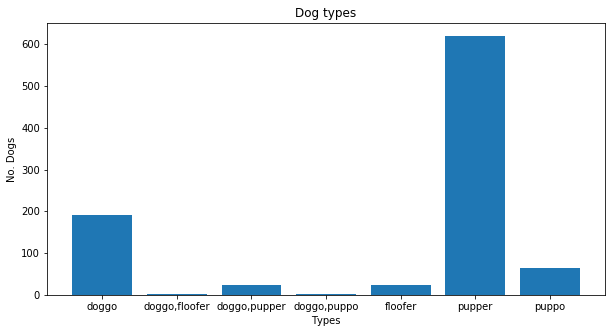

In [219]:
plt.figure(figsize=[10, 5])
plt.bar(x = arc_df.Dog_stage.value_counts().keys(), height = arc_df.Dog_stage.value_counts() )
plt.title('Dog types')
plt.xlabel('Types')
plt.ylabel('No. Dogs')
plt.show()

- The distribution of the dogs types shows that most of the dogs has type of pupper.

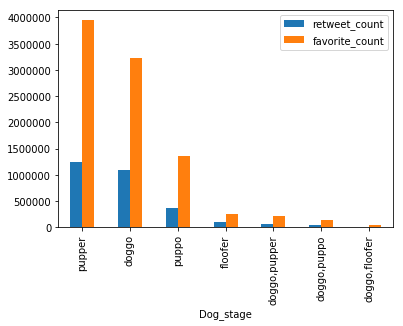

In [220]:
d = arc_df.groupby('Dog_stage')['retweet_count', 'favorite_count'].sum()
d = d.sort_values(['retweet_count', 'favorite_count'], ascending=False)
d.iloc[0:10, :].plot(kind='bar');

- The pupper dogs have the highst retweet and favorite count rather than other dog stage.

Text(0,0.5,'Name')

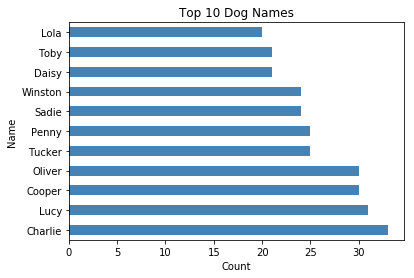

In [221]:
top_names = arc_df.name.value_counts()[0:11].sort_values(axis=0, ascending=False)
top_names.plot(kind = 'barh', color='steelblue')
plt.title('Top 10 Dog Names')
plt.xlabel('Count')
plt.ylabel('Name')

- After counting the occurrence of each dog name we found that Charlie, Lucy, Cooper and Oliver are the most common.